In [1]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sigma = 0.1
a = 0.1
timestep = 360
length = 30
forward_rate = 0.05
day_count = ql.Thirty360()
todays_date = ql.Date(15, 1, 2015)

In [3]:
ql.Settings.instance().evaluationDate = todays_date
spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

In [4]:
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

In [5]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

In [6]:
num_paths = 10
time, paths = generate_paths(num_paths, timestep)
fig, ax = plt.subplots()
for i in range(num_paths):
    ax.plot(time, paths[i, :], lw=0.8, alpha=0.6)

In [7]:
num_paths = 1000
time, paths = generate_paths(num_paths, timestep)

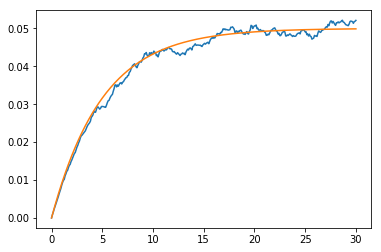

In [8]:
vol = [np.var(paths[:, i]) for i in range(timestep+1)]
plt.plot(time, vol)
plt.plot(time, sigma*sigma/(2*a)*(1.0-np.exp(-2.0*a*np.array(time))), '-')

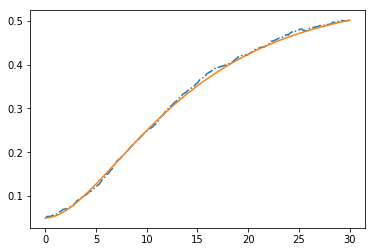

In [9]:
def alpha(forward, sigma, a, t):
    return forward + 0.5 * np.power(sigma / a * (1.0 - np.exp(-a*t)), 2)
avg = [np.mean(paths[:, i]) for i in range(timestep + 1)]
plt.plot(time, avg, '-.')
plt.plot(time, alpha(forward_rate, sigma, a, time), '-')